<a href="https://colab.research.google.com/github/b-paramesh/PCA-PRINCIPLE_COMPONENT_ANALYSIS-/blob/main/Day_26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris=load_iris()
X=iris.data
y=iris.target

In [ ]:
X_scaled=StandardScaler().fit_transform(X)

In [ ]:
X.shape

(150, 4)

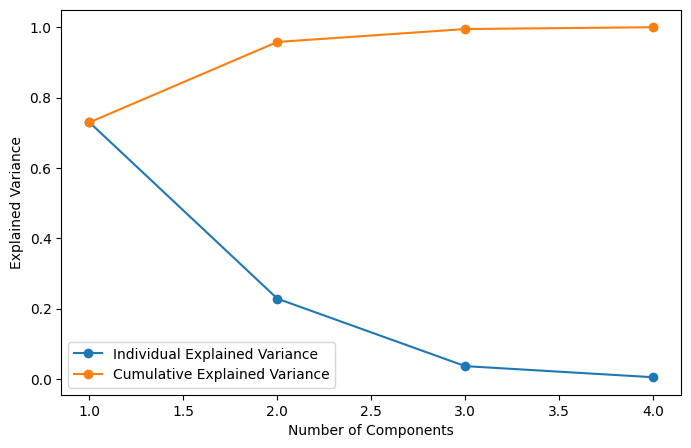

In [ ]:
pca=PCA()
x_pca=pca.fit_transform(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label="Individual Explained Variance")
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'o-',label="Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.legend()
plt.show()

In [ ]:
pca_95=PCA(n_components=0.95)
X_reduced=pca_95.fit_transform(X_scaled)
print(f"Reduced Shape:{X_reduced.shape}")

Reduced Shape:(150, 2)


Visualize Top 2 Components

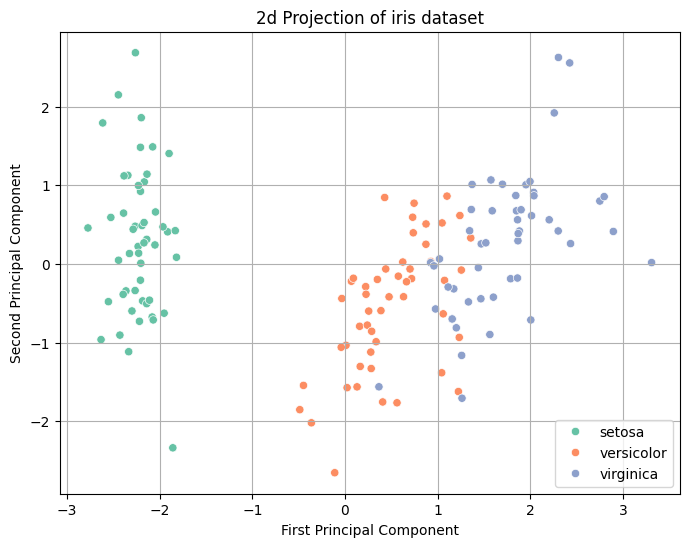

In [ ]:
pca_2d=PCA(n_components=2)
x_2d=pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_2d[:,0],y=x_2d[:,1],hue=iris.target_names[y],palette="Set2")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2d Projection of iris dataset")
plt.grid(True)
plt.show()

Customer Behavior Segmentation for Retail Optimization
You are working as a Data Scientist in an e-commerce company.
The company has collected detailed customer behavior data, including:
Annual Income
Spending Score
Purchase Frequency
Average Basket Value
Website Visit Time
Discount Usage Rate
Product Category Preferences
Return Rate
The dataset contains multiple numerical features, making it difficult to:
Visualize customer groups
Train clustering models efficiently
Understand key behavioral patterns
Dataset Name:

Customer Personality Analysis
🔗 https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
Customer Personality Analysis | Kaggle
Analysis of company's ideal customers

🔹 Part 1 – Data Preparation
Load the dataset.
Select only numerical features relevant to customer behavior.
Handle missing values.
Standardize the data.
🔹 Part 2 – PCA Implementation
Apply PCA on the standardized dataset.
Plot the explained variance ratio.
Determine:
How many principal components are needed to retain at least 90% of total variance?
Reduce the dataset to those components.
🔹 Part 3 – Interpretation
Identify:
Which original features contribute most to PC1?
Which features dominate PC2?
Explain what PC1 and PC2 represent in business terms.
🔹 Part 4 – Practical Application
Visualize customers in 2D PCA space.
Now apply K-Means clustering on:
Original dataset
PCA-reduced dataset
Compare:
Silhouette score
Computation time
Cluster separation quality


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (2240, 29)

Columns in Dataset:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


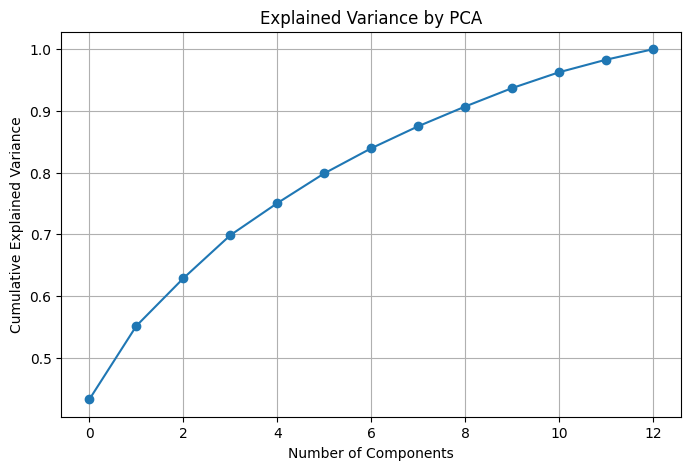


Number of components to retain 90% variance: 9
Reduced Data Shape: (2240, 9)

Top Contributors to PC1:
NumCatalogPurchases    0.344482
MntMeatProducts        0.338480
Income                 0.316244
MntWines               0.315722
NumStorePurchases      0.314037
MntFishProducts        0.311169
MntFruits              0.301919
MntSweetProducts       0.300859
MntGoldProds           0.246359
NumWebPurchases        0.232354
Recency                0.007324
NumDealsPurchases     -0.041629
NumWebVisitsMonth     -0.271088
Name: PC1, dtype: float64

Top Contributors to PC2:
NumDealsPurchases      0.635195
NumWebPurchases        0.495958
NumWebVisitsMonth      0.407356
MntWines               0.223505
MntGoldProds           0.195428
NumStorePurchases      0.189953
NumCatalogPurchases    0.011996
Recency               -0.022122
Income                -0.029493
MntSweetProducts      -0.097921
MntFruits             -0.122428
MntMeatProducts       -0.127221
MntFishProducts       -0.134611
Name: PC2, d

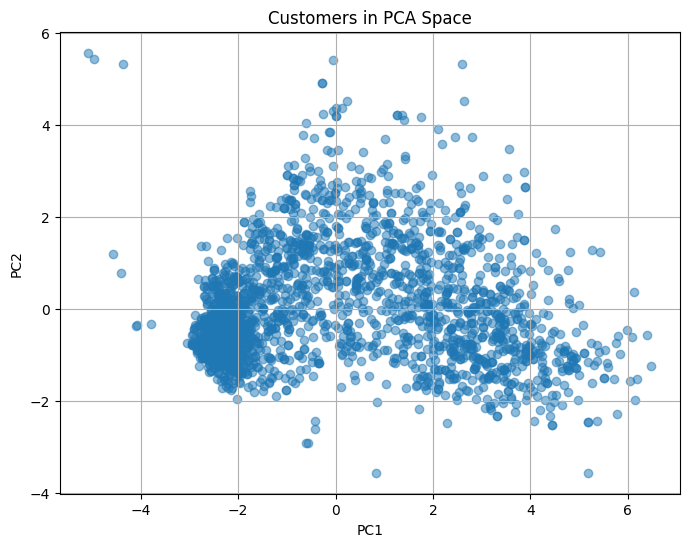


--- KMeans on Original Data ---
Silhouette Score: 0.2595160362589274
Computation Time: 0.31568193435668945

--- KMeans on PCA Reduced Data ---
Silhouette Score: 0.28354048525431147
Computation Time: 0.12463712692260742

Comparison Table:
             Method  Silhouette Score  Computation Time
0     Original Data          0.259516          0.315682
1  PCA Reduced Data          0.283540          0.124637


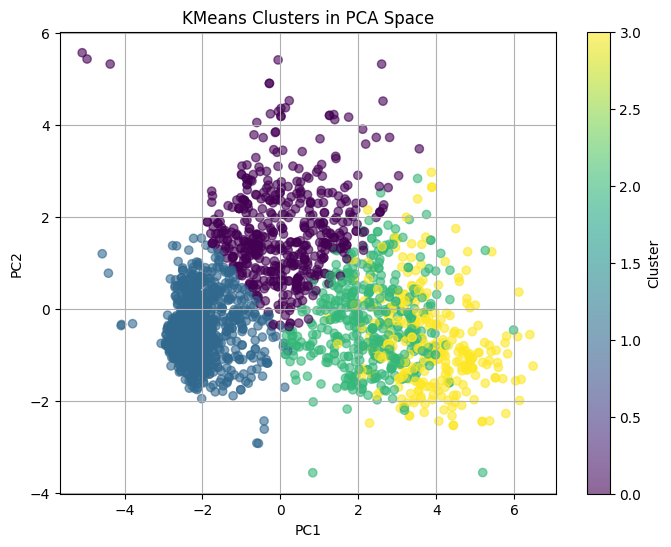


✅ PROJECT COMPLETED SUCCESSFULLY!


In [ ]:
# =====================================================
# CUSTOMER SEGMENTATION USING PCA + KMEANS
# FINAL WORKING VERSION (COLAB READY)
# =====================================================

# ==========================
# 1️⃣ Mount Google Drive
# ==========================
from google.colab import drive
drive.mount('/content/drive')

# ==========================
# 2️⃣ Import Libraries
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ==========================
# 3️⃣ Load Dataset (TAB FIXED)
# ==========================
path = "/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv"

# IMPORTANT: This file uses TAB separator
df = pd.read_csv(path, sep='\t')

# Clean column names
df.columns = df.columns.str.strip()

print("Dataset Shape:", df.shape)
print("\nColumns in Dataset:")
print(df.columns.tolist())

# ==========================
# 4️⃣ Select Numerical Features
# ==========================
num_features = [
    'Income', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

df_selected = df[num_features]

# ==========================
# 5️⃣ Handle Missing Values
# ==========================
df_selected = df_selected.fillna(df_selected.mean())

# ==========================
# 6️⃣ Standardize Data
# ==========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# ==========================
# 7️⃣ Apply PCA
# ==========================
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot Explained Variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA")
plt.grid()
plt.show()

# Find components for 90% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1

print("\nNumber of components to retain 90% variance:", n_components)

# ==========================
# 8️⃣ Reduce Dataset
# ==========================
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

print("Reduced Data Shape:", X_reduced.shape)

# ==========================
# 9️⃣ PCA Interpretation
# ==========================
loadings = pd.DataFrame(
    pca_final.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=num_features
)

print("\nTop Contributors to PC1:")
print(loadings['PC1'].sort_values(ascending=False))

print("\nTop Contributors to PC2:")
print(loadings['PC2'].sort_values(ascending=False))

# ==========================
# 🔟 Visualize PCA (2D)
# ==========================
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers in PCA Space")
plt.grid()
plt.show()

# ==========================
# 1️⃣1️⃣ KMeans on Original Data
# ==========================
k = 4

start = time.time()
kmeans_original = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(X_scaled)
time_original = time.time() - start

sil_original = silhouette_score(X_scaled, labels_original)

print("\n--- KMeans on Original Data ---")
print("Silhouette Score:", sil_original)
print("Computation Time:", time_original)

# ==========================
# 1️⃣2️⃣ KMeans on PCA Data
# ==========================
start = time.time()
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_reduced)
time_pca = time.time() - start

sil_pca = silhouette_score(X_reduced, labels_pca)

print("\n--- KMeans on PCA Reduced Data ---")
print("Silhouette Score:", sil_pca)
print("Computation Time:", time_pca)

# ==========================
# 1️⃣3️⃣ Compare Results
# ==========================
comparison = pd.DataFrame({
    "Method": ["Original Data", "PCA Reduced Data"],
    "Silhouette Score": [sil_original, sil_pca],
    "Computation Time": [time_original, time_pca]
})

print("\nComparison Table:")
print(comparison)

# ==========================
# 1️⃣4️⃣ Visualize Clusters
# ==========================
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_pca, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters in PCA Space")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

print("\n✅ PROJECT COMPLETED SUCCESSFULLY!")
